<a href="https://colab.research.google.com/github/adlihs/PyTorch/blob/main/Modeling_Non_Linear_Patterns_with_Activations_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modeling Non-Linear Patterns with Activation Functions**
Continue with previous problem, once we added cars data the model could not learn from complex data.
To fix it I will use a **non-linear activation functions**, the most popular and powerful is **ReLU (rectified Linear Unit)**

## Imports

In [ ]:
!pip install helper_utils

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import helper_utils

## Preparing the Non-Linear Data

In [4]:
# Combined dataset: bikes for short distances, cars for longer ones
distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

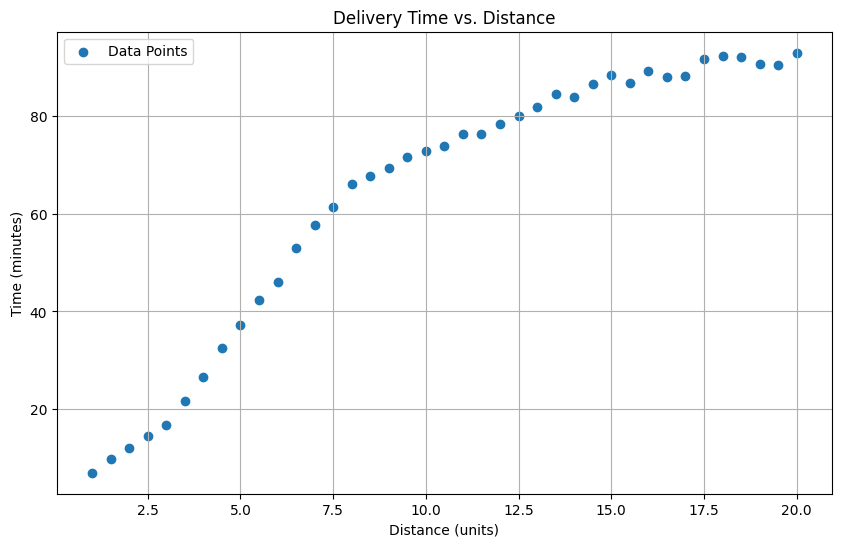

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(distances.numpy(), times.numpy(), label='Data Points')
plt.xlabel('Distance (units)')
plt.ylabel('Time (minutes)')
plt.title('Delivery Time vs. Distance')
plt.grid(True)
plt.legend()
plt.show()
# As we can see the data plot folloes a non_linear pattern

## A new step: Normalizing the Data
This is a standard technique that makes the training process more stable and effective by adjusting the scale of the data, converting the original data from `1.0 to 20.0 miles` and approximately `7 to 93 minutes` into a new, normalized scale.

In [7]:
# calculate the mean and stadanrd deviation for the 'distances' tensor
distances_mean = distances.mean()
distances_std = distances.std()

# Calculate the mean and astandard deviation for the 'times' tensor
times_mean = times.mean()
times_std = times.std()

# Apply standardization to the distances.
distances_norm = (distances - distances_mean) / distances_std

# Apply standardization to the times.
times_norm = (times - times_mean) / times_std

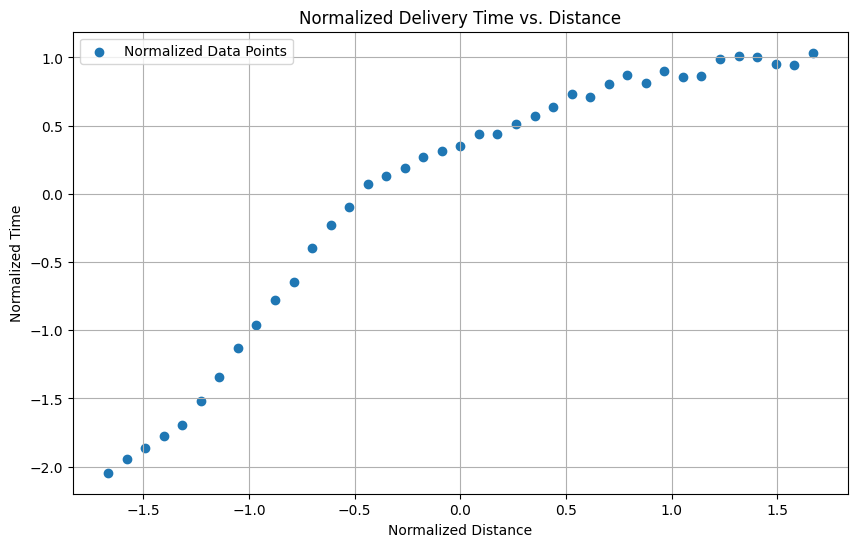

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(distances_norm.numpy(), times_norm.numpy(), label='Normalized Data Points')
plt.xlabel('Normalized Distance')
plt.ylabel('Normalized Time')
plt.title('Normalized Delivery Time vs. Distance')
plt.grid(True)
plt.legend()
plt.show()

## Building the Non-Linear Model
With the normalized data ready, we are ready to build a model capable of learning curved pattern using a `ReLU` activation function.

In [16]:
# A neural network with 1 hidden layer containing 3 neurons.
torch.manual_seed(27)

model = nn.Sequential(
    nn.Linear(1,3),
    nn.ReLU(),
    nn.Linear(3,1)
)

## Training
Define the loss function and the optimizer for training

In [17]:
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

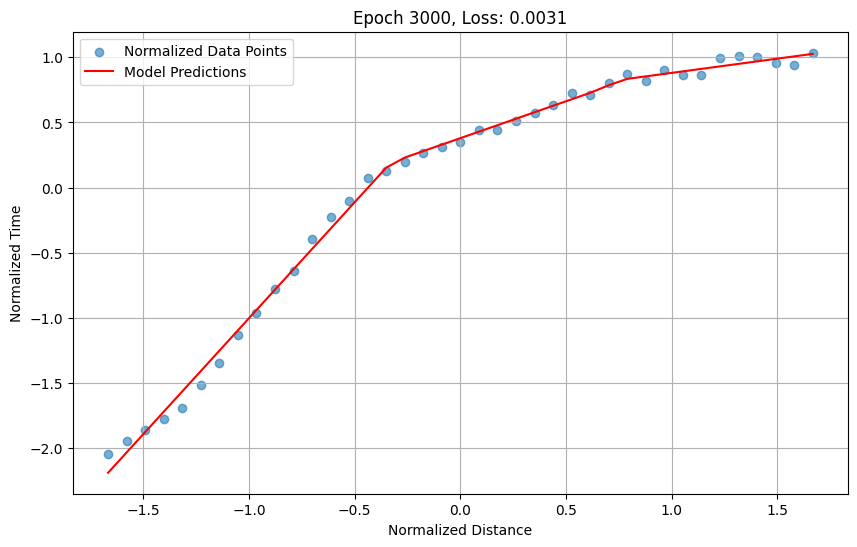


Training Complete.

Final Loss: 0.0031437124125659466


In [18]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Define a helper function to plot training progress
def plot_training_progress_custom(epoch, loss, model, distances_norm, times_norm):
    clear_output(wait=True) # Clear previous plot for live update
    plt.figure(figsize=(10, 6))

    # Plot original normalized data points
    plt.scatter(distances_norm.numpy(), times_norm.numpy(), label='Normalized Data Points', alpha=0.6)

    # Get model predictions
    with torch.no_grad(): # Disable gradient calculations for plotting
        model.eval() # Set model to evaluation mode
        predictions = model(distances_norm)
        model.train() # Set model back to training mode for continued training

    # Plot model predictions
    plt.plot(distances_norm.numpy(), predictions.numpy(), color='red', label='Model Predictions')

    plt.xlabel('Normalized Distance')
    plt.ylabel('Normalized Time')
    plt.title(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
    plt.grid(True)
    plt.legend()
    plt.show()

# Training loop
for epoch in range(3000):
  # Reset the optimizer's gradients
  optimizer.zero_grad()

  # Make predictions (forward pass)
  outputs = model(distances_norm)

  # Calculate the loss
  loss = loss_function(outputs,times_norm)

  # Calculate adjustments (backward pass)
  loss.backward()

  # Update the model's parameters
  optimizer.step()

  # create a live plot every 50 epochs
  if (epoch + 1) % 50 == 0:
    plot_training_progress_custom(
        epoch = epoch,
        loss = loss,
        model = model,
        distances_norm = distances_norm,
        times_norm = times_norm
    )

print("\nTraining Complete.")
print(f"\nFinal Loss: {loss.item()}")

## Checking the final fit

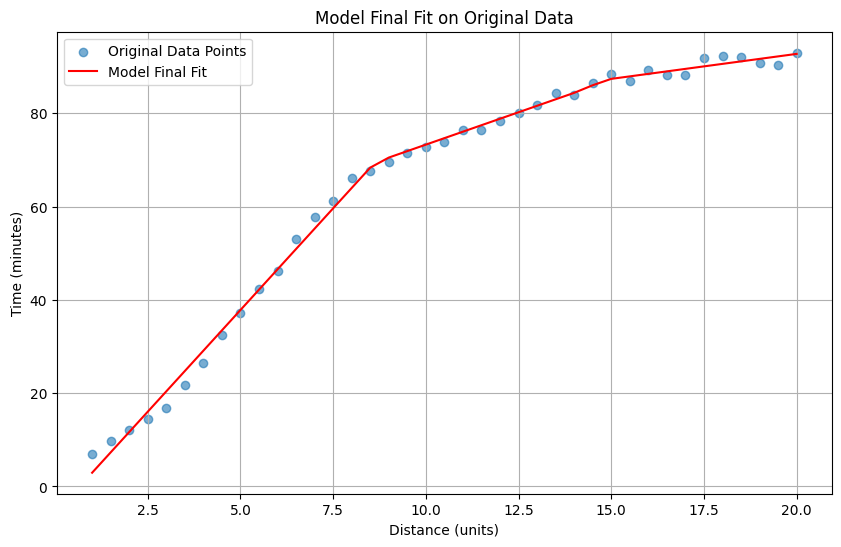

In [20]:
import matplotlib.pyplot as plt

def plot_final_fit(model, distances, times, distances_norm, times_std, times_mean):
    plt.figure(figsize=(10, 6))

    # Plot original data points
    plt.scatter(distances.numpy(), times.numpy(), label='Original Data Points', alpha=0.6)

    # Get model predictions on normalized data
    with torch.no_grad():
        model.eval() # Set model to evaluation mode
        predictions_norm = model(distances_norm)
        model.train() # Set model back to training mode

    # Denormalize predictions
    predictions_denorm = (predictions_norm * times_std) + times_mean

    # Plot the model's final fit
    plt.plot(distances.numpy(), predictions_denorm.numpy(), color='red', label='Model Final Fit')

    plt.xlabel('Distance (units)')
    plt.ylabel('Time (minutes)')
    plt.title('Model Final Fit on Original Data')
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the custom plotting function
plot_final_fit(model, distances, times, distances_norm, times_std, times_mean)

## Making a prediction

In [25]:
distance_to_predict = 2.1

In [27]:
# Use the torch.no_grad() context manager for efficent predictions
with torch.no_grad():
  # Normalize the input distance
  distance_tensor = torch.tensor([[distance_to_predict]], dtype=torch.float32)
  new_distance_norm = (distance_tensor - distances_mean) / distances_std

  # Get the normalized prediction from the model
  predicted_time_norm = model(new_distance_norm)

  # De-normalize the output to get the actual time in minutes
  predicted_time_actual = (predicted_time_norm * times_std) + times_mean

  # --- Decision Making logic ---
  print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time_actual.item():.1f} minutes")

  # First, check if the delivery is possible within the 45-minute timeframe
  if predicted_time_actual.item() > 45:
    print("\nDecision: Do NOT promise the delivery in under 45 minutes")
  else:
    # If it is possible, then determine the vehicle based on the distance
    if distance_to_predict <= 3:
      print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (<= 3 miles), use a bike")
    else:
      print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (> 3 miles), use a car.")

Prediction for a 2.1-mile delivery: 12.5 minutes

Decision: Yes, delivery is possible. Since the distance is 2.1 miles (<= 3 miles), use a bike
